In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
import glob
import warnings
import datetime
import itertools
from pylab import rcParams
import requests
from datetime import datetime, timedelta
import seaborn as sns
from scipy.spatial import distance
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
## Path of the files
df = pd.read_csv('dublinbikes_20180701_20181001.csv')
df = df.sort_values(by = 'TIME')
df.drop_duplicates()#Delete duplicate rows
df.head(20)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501
12558,93,2018-08-01 12:30:02,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,-6.296924
12420,92,2018-08-01 12:30:02,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,-6.292432
1794,14,2018-08-01 12:30:02,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,-6.263371
12282,91,2018-08-01 12:30:02,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,-6.231291
12144,90,2018-08-01 12:30:02,2018-08-01 12:22:20,BENSON STREET,40,0,0,Close,Benson Street,53.344154,-6.233451
1932,15,2018-08-01 12:30:02,2018-08-01 12:27:59,HARDWICKE STREET,16,16,0,Open,Hardwicke Street,53.355473,-6.264423
12006,89,2018-08-01 12:30:02,2018-08-01 12:19:52,FITZWILLIAM SQUARE EAST,40,3,37,Open,Fitzwilliam Square East,53.335213,-6.250900
2070,16,2018-08-01 12:30:02,2018-08-01 12:22:56,GEORGES QUAY,20,17,3,Open,Georges Quay,53.347507,-6.252192
11868,88,2018-08-01 12:30:02,2018-08-01 12:25:37,BLACKHALL PLACE,30,27,3,Open,Blackhall Place,53.348801,-6.281637


In [3]:
group = df.groupby(['STATION ID'])
df1 = group.describe()['AVAILABLE BIKE STANDS'] # Only look at the statistical information in the math column
#print(df_year1)
# Calculate the new column "max1/5", which is one-fifth of the value of each row's "max" column
df1['max1/5'] = df1['max'] / 5

# Identify the rows where the difference between the average and "max" is less than "max1/5", and add a column after these rows labeled as "always full"
df1['label'] = ''
df1.loc[(df1['max'] - df1['mean']) < df1['max1/5'], 'label'] = 'Always full'

# Identify the rows where the difference between the mean and "min" is less than "max1/5", and add a column after these rows labeled as "always empty"
df1.loc[(df1['mean'] - df1['min']) < df1['max1/5'], 'label'] = 'Always empty'

# Filter out rows with annotated columns containing content
filtered_df = df1[df1['label'] != '']
print(filtered_df)



              count       mean        std   min   25%   50%   75%   max  \
STATION ID                                                                
15          17337.0  13.007383   3.496562   0.0  11.0  14.0  16.0  16.0   
30          17337.0  16.303628   4.259153   0.0  15.0  18.0  19.0  20.0   
59          17337.0  16.447079   4.140136   0.0  15.0  18.0  20.0  20.0   
65          17337.0  33.163985   9.847372   0.0  31.0  38.0  40.0  40.0   
79          17337.0  22.409240   6.278922   0.0  20.0  25.0  27.0  27.0   
90          17337.0   4.573283  12.075317   0.0   0.0   0.0   0.0  40.0   
103         17337.0  36.369729   4.131142  21.0  33.0  38.0  40.0  40.0   
104         17337.0  34.871085   5.555260  16.0  31.0  37.0  40.0  40.0   
105         17337.0  31.810232   5.071726  10.0  30.0  34.0  36.0  36.0   
106         17337.0  33.372152   7.579333   5.0  31.0  35.0  39.0  40.0   
113         11598.0  32.504397  10.308709   0.0  29.0  38.0  40.0  40.0   

            max1/5      

In [4]:
group = df.groupby(['NAME'])
df1 = group.describe()['AVAILABLE BIKE STANDS'] # Only look at the statistical information in the math column
#print(df_year1)
# Calculate the new column "max1/5", which is one-fifth of the value of each row's "max" column
df1['max1/5'] = df1['max'] / 5

# Identify the rows where the difference between the average and "max" is less than "max1/5", and add a column after these rows labeled as "always full"
df1['label'] = ''
df1.loc[(df1['max'] - df1['mean']) < df1['max1/5'], 'label'] = 'Always full'

# Identify the rows where the difference between the mean and "min" is less than "max1/5", and add a column after these rows labeled as "always empty"
df1.loc[(df1['mean'] - df1['min']) < df1['max1/5'], 'label'] = 'Always empty'

# Filter out rows with annotated columns containing content
filtered_df = df1[df1['label'] != '']
print(filtered_df)



                                count       mean        std   min   25%   50%  \
NAME                                                                            
BENSON STREET                 17337.0   4.573283  12.075317   0.0   0.0   0.0   
CONVENTION CENTRE             17337.0  33.163985   9.847372   0.0  31.0  38.0   
DENMARK STREET GREAT          17337.0  16.447079   4.140136   0.0  15.0  18.0   
ECCLES STREET EAST            17337.0  22.409240   6.278922   0.0  20.0  25.0   
GRANGEGORMAN LOWER (CENTRAL)  17337.0  34.871085   5.555260  16.0  31.0  37.0   
GRANGEGORMAN LOWER (NORTH)    17337.0  31.810232   5.071726  10.0  30.0  34.0   
GRANGEGORMAN LOWER (SOUTH)    17337.0  36.369729   4.131142  21.0  33.0  38.0   
HARDWICKE STREET              17337.0  13.007383   3.496562   0.0  11.0  14.0   
MERRION SQUARE SOUTH          11598.0  32.504397  10.308709   0.0  29.0  38.0   
PARNELL SQUARE NORTH          17337.0  16.303628   4.259153   0.0  15.0  18.0   
RATHDOWN ROAD               

In [5]:
# Time columns updating

df['LAST UPDATED'] = pd.to_datetime(df['LAST UPDATED'])
df['hour'] = df['LAST UPDATED'].dt.hour
df['date_hour'] = df['LAST UPDATED'].dt.strftime('%Y-%m-%d %H')
df['day_of_week'] = df['LAST UPDATED'].dt.day_name()


# Time columns updating
df['TIME'] = pd.to_datetime(df['TIME'])
df['hour_ht'] = df['TIME'].dt.hour
df['date_hour_ht'] = df['LAST UPDATED'].dt.strftime('%Y-%m-%d %H')


# Add a column for weekdays and weekends
df['day_type'] = df['LAST UPDATED'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

df['capacity_ratio'] = df['AVAILABLE BIKES'] / df['BIKE STANDS']
mon_sub_df = df[df['day_of_week'] == "Monday"]
# Group by 'address' and calculate the standard deviation for 'capacity_ratio'
std_dev = mon_sub_df.groupby('NAME')['capacity_ratio'].agg(['std']).reset_index()

# Rename the 'std' column to 'capacity_ratio_std' to make it clearer
std_dev.rename(columns={'std': 'capacity_ratio_std'}, inplace=True)

# Sort the data by standard deviation in descending order and select the top 10
top_10_std_dev = std_dev.sort_values(by='capacity_ratio_std', ascending=False).head(10)
top_10_std_dev_desc = std_dev.sort_values(by='capacity_ratio_std', ascending=True).head(10)

In [6]:
mon_sub_df.head(20)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,hour,date_hour,day_of_week,hour_ht,date_hour_ht,day_type,capacity_ratio
143917,8,2018-08-06 00:05:02,2018-08-06 00:02:30,CUSTOM HOUSE QUAY,30,25,5,Open,Custom House Quay,53.347885,-6.248048,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.166667
170413,101,2018-08-06 00:05:02,2018-08-06 00:02:44,KING STREET NORTH,30,8,22,Open,King Street North,53.350292,-6.273507,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.733333
155725,50,2018-08-06 00:05:02,2018-08-06 00:03:06,GEORGES LANE,40,14,26,Open,George's Lane,53.350231,-6.279696,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.650000
170125,100,2018-08-06 00:05:02,2018-08-06 00:03:10,HEUSTON BRIDGE (SOUTH),25,23,2,Open,Heuston Bridge (South),53.347107,-6.292041,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.080000
169837,99,2018-08-06 00:05:02,2018-08-06 00:02:25,CITY QUAY,30,26,4,Open,City Quay,53.346638,-6.246154,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.133333
153133,41,2018-08-06 00:05:02,2018-08-06 00:03:00,HARCOURT TERRACE,20,3,17,Open,Harcourt Terrace,53.332764,-6.257942,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.850000
148525,25,2018-08-06 00:05:02,2018-08-06 00:02:34,MERRION SQUARE EAST,30,27,3,Open,Merrion Square East,53.339436,-6.246548,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.100000
149389,28,2018-08-06 00:05:02,2018-08-06 00:02:52,MOUNTJOY SQUARE WEST,30,22,8,Open,Mountjoy Square West,53.356300,-6.258586,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.266667
144493,10,2018-08-06 00:05:02,2018-08-06 00:02:16,DAME STREET,16,3,13,Open,Dame Street,53.344006,-6.266802,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,0.812500
152845,40,2018-08-06 00:05:02,2018-08-06 00:02:33,JERVIS STREET,21,0,21,Open,Jervis Street,53.348301,-6.266651,0,2018-08-06 00,Monday,0,2018-08-06 00,Weekday,1.000000


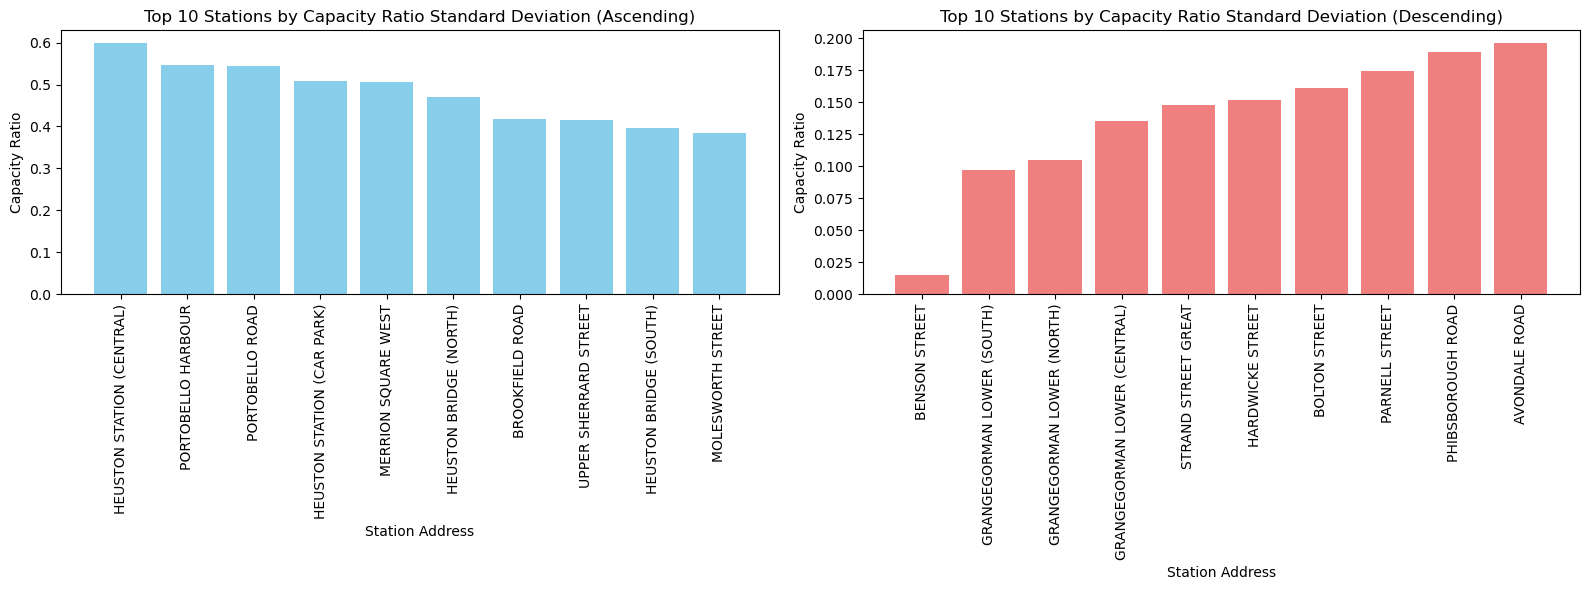

In [7]:
# Group by 'address' and calculate the total available bikes and bike stands for each station
sub_df_address_group = mon_sub_df.groupby(['NAME']).agg({'AVAILABLE BIKES': 'sum', 'BIKE STANDS': 'sum'}).reset_index()

# Calculate the capacity ratio for each station
sub_df_address_group['capacity_ratio'] = sub_df_address_group['AVAILABLE BIKES'] / sub_df_address_group['BIKE STANDS']

# Get the addresses of the top 10 stations by capacity ratio (ascending)
top_10_addresses = top_10_std_dev['NAME'].tolist()

# Create a subset of sub_df for the top 10 stations (ascending)
top_10_subset = sub_df_address_group[sub_df_address_group['NAME'].isin(top_10_addresses)]

# Order data in desc format
top_10_subset = top_10_subset.sort_values(by='capacity_ratio', ascending=False)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the top 10 stations by capacity ratio (ascending) in the first subplot
axes[0].bar(top_10_subset['NAME'], top_10_subset['capacity_ratio'], color='skyblue')
axes[0].set_title('Top 10 Stations by Capacity Ratio Standard Deviation (Ascending)')
axes[0].set_ylabel('Capacity Ratio')
axes[0].set_xlabel('Station Address')
axes[0].tick_params(axis='x', rotation=90, labelrotation=90)

# Get the addresses of the top 10 stations by capacity ratio (descending)
top_10_addresses_desc = top_10_std_dev_desc['NAME'].tolist()

# Create a subset of sub_df for the top 10 stations (descending)
top_10_subset_desc = sub_df_address_group[sub_df_address_group['NAME'].isin(top_10_addresses_desc)]
top_10_subset_desc = top_10_subset_desc.sort_values(by='capacity_ratio', ascending=True)


# Plotting the top 10 stations by capacity ratio (descending) in the second subplot
axes[1].bar(top_10_subset_desc['NAME'], top_10_subset_desc['capacity_ratio'], color='lightcoral')
axes[1].set_title('Top 10 Stations by Capacity Ratio Standard Deviation (Descending)')
axes[1].set_ylabel('Capacity Ratio')
axes[1].set_xlabel('Station Address')
axes[1].tick_params(axis='x', rotation=90, labelrotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

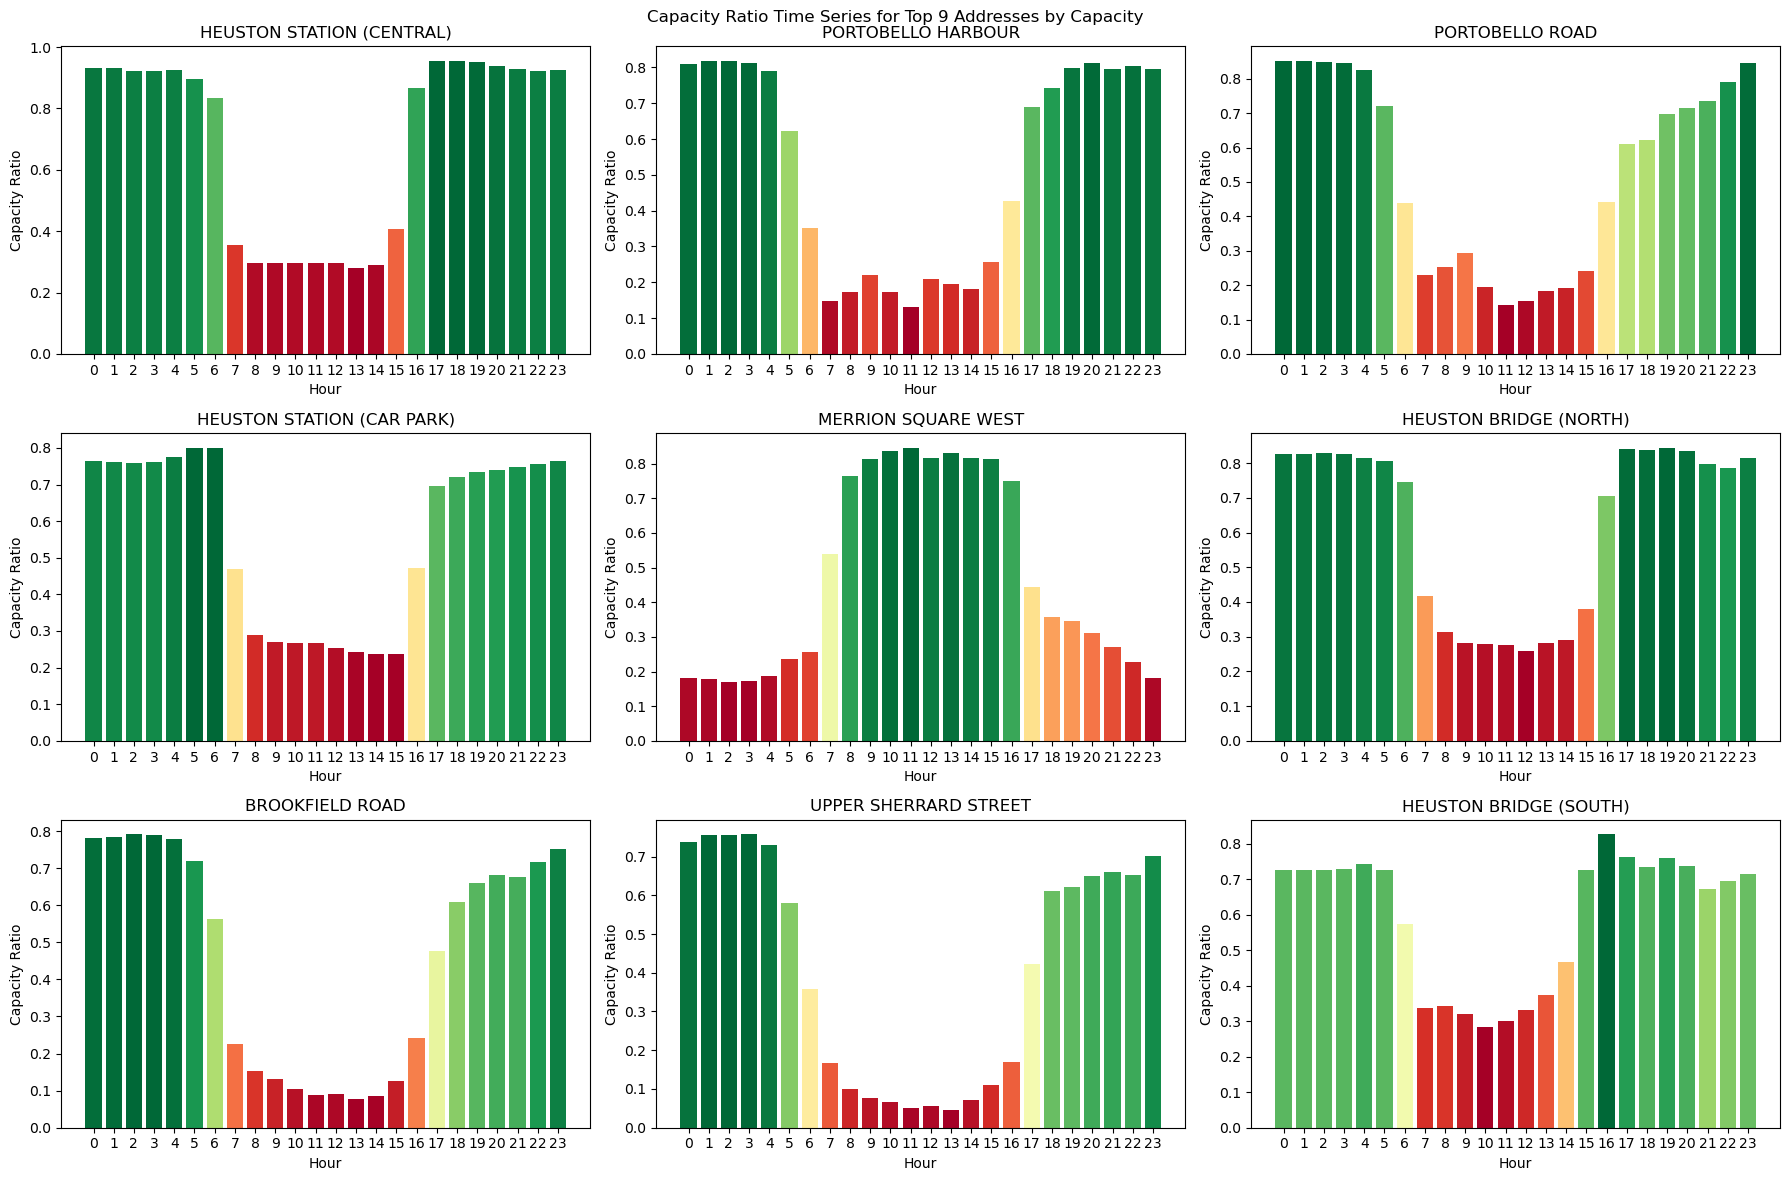

In [8]:
# get unique address list
top_10_addresses = list(top_10_subset['NAME'])

# Group by 'hour' and 'address' and aggregate sum
sub_df_hour = df.groupby(['hour', 'NAME']).agg({'AVAILABLE BIKES': 'sum', 'BIKE STANDS': 'sum'}).reset_index()

# Calculate 'capacity_ratio' for sub_df_hour
sub_df_hour['capacity_ratio'] = sub_df_hour['AVAILABLE BIKES'] / sub_df_hour['BIKE STANDS']

# Filter to only include addresses from top_10_addresses
sub_df_hour_top_10 = sub_df_hour[sub_df_hour['NAME'].isin(top_10_addresses)]


fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Capacity Ratio Time Series for Top 9 Addresses by Capacity')  # Update the title

# Using a colormap that transitions from red to yellow to green
cmap = plt.cm.RdYlGn

# Loop through the top 9 addresses
for i, address in enumerate(top_10_addresses[:-1]):  # Exclude the 10th address
    ax = axes[i//3, i%3]
    data = sub_df_hour_top_10[sub_df_hour_top_10['NAME'] == address]
    
    min_ratio = data['capacity_ratio'].min()
    max_ratio = data['capacity_ratio'].max()
    
    # Normalize the capacity ratio for color mapping
    normalized_ratios = (data['capacity_ratio'] - min_ratio) / (max_ratio - min_ratio)
    
    # Bar plot for each address with gradient colors
    bar_colors = cmap(normalized_ratios)
    ax.bar(data['hour'], data['capacity_ratio'], color=bar_colors)
    
    ax.set_title(address)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Capacity Ratio')

    # Set x-axis ticks and labels for each hour
    ax.set_xticks(data['hour'])
    ax.set_xticklabels(data['hour'])

# Remove any unused subplots (in case you have less than 9 addresses)
for i in range(len(top_10_addresses) - 1, 9):
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top space so the suptitle doesn't overlap
plt.show()

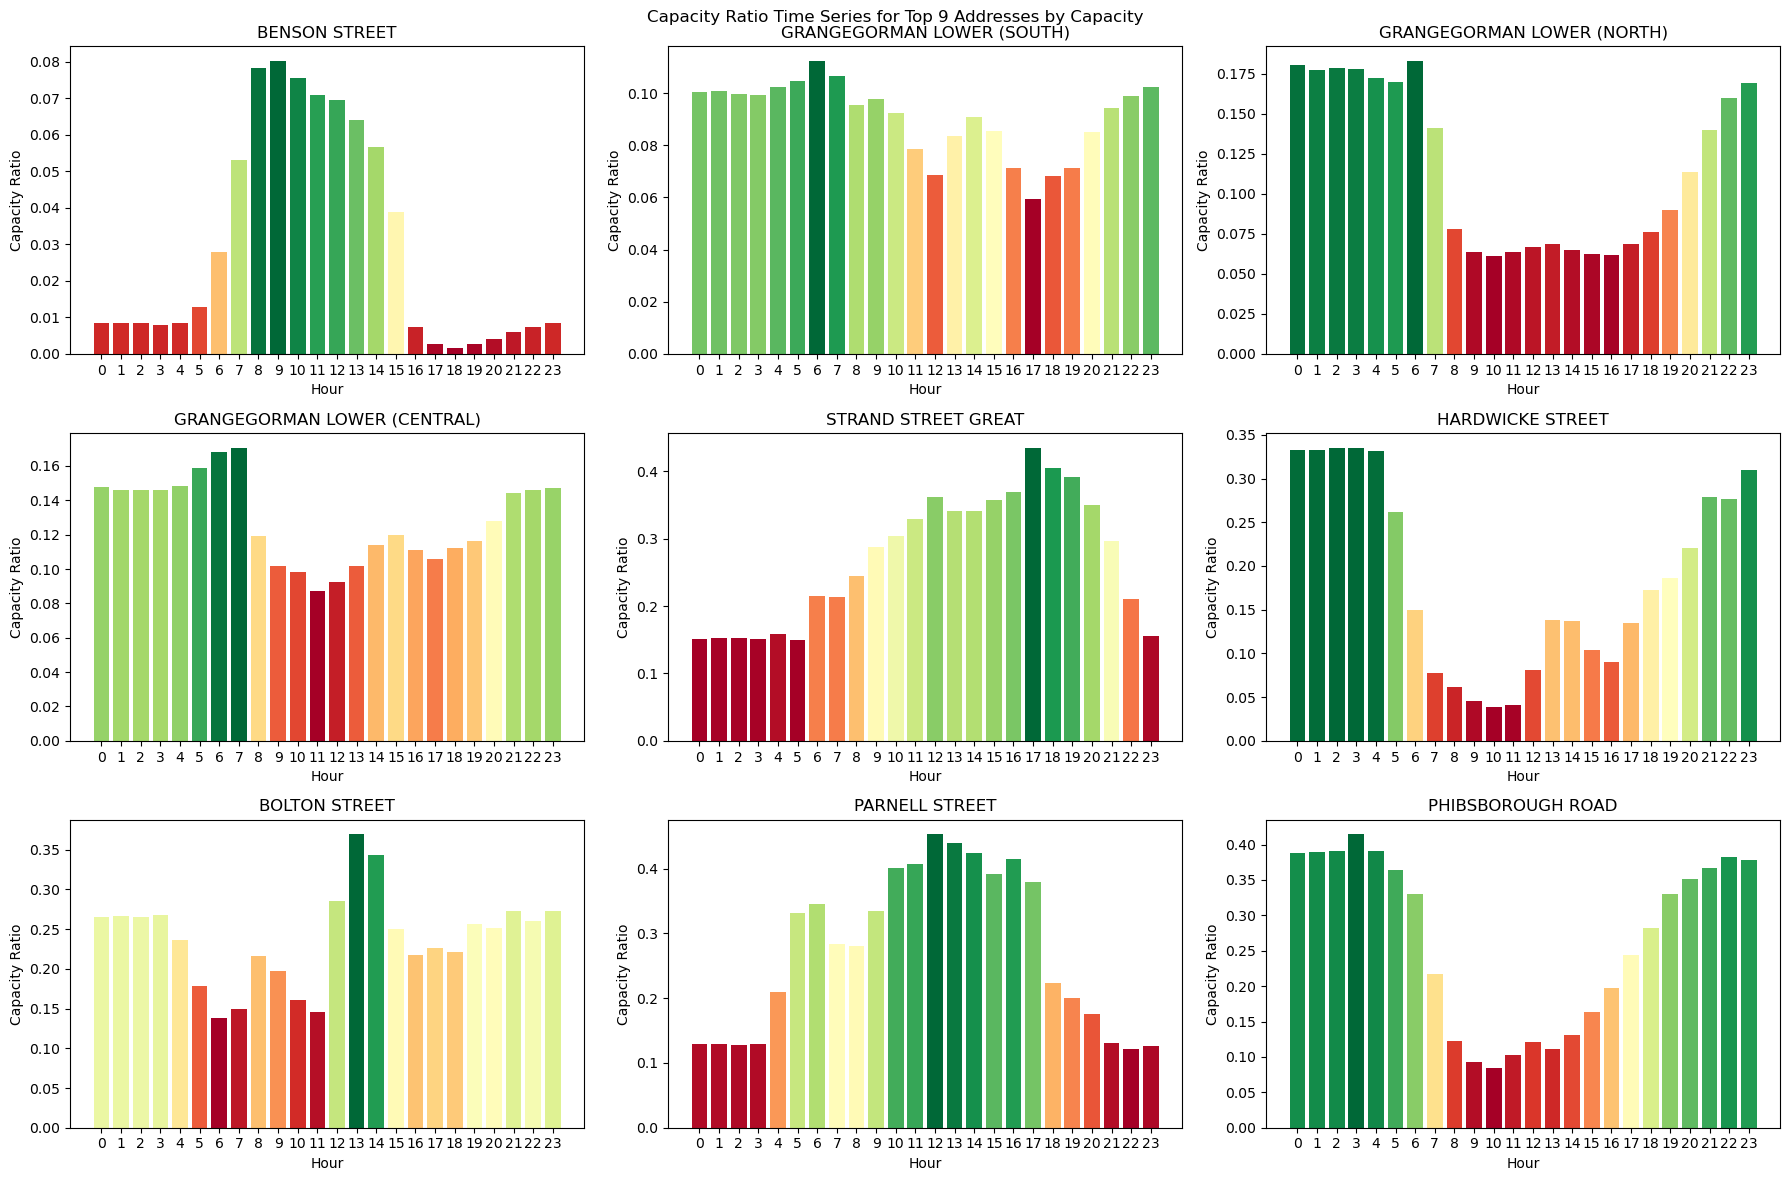

In [9]:
# get unique address list
top_10_addresses_desc = list(top_10_subset_desc['NAME'])

# Filter to only include addresses from top_10_addresses
sub_df_hour_top_10_desc = sub_df_hour[sub_df_hour['NAME'].isin(top_10_addresses_desc)]


fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Capacity Ratio Time Series for Top 9 Addresses by Capacity')  # Update the title

# Using a colormap that transitions from red to yellow to green
cmap = plt.cm.RdYlGn

# Loop through the top 9 addresses
for i, address in enumerate(top_10_addresses_desc[:-1]):  # Exclude the 10th address
    ax = axes[i//3, i%3]
    data = sub_df_hour_top_10_desc[sub_df_hour_top_10_desc['NAME'] == address]
    
    min_ratio = data['capacity_ratio'].min()
    max_ratio = data['capacity_ratio'].max()
    
    # Normalize the capacity ratio for color mapping
    normalized_ratios = (data['capacity_ratio'] - min_ratio) / (max_ratio - min_ratio)
    
    # Bar plot for each address with gradient colors
    bar_colors = cmap(normalized_ratios)
    ax.bar(data['hour'], data['capacity_ratio'], color=bar_colors)
    
    ax.set_title(address)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Capacity Ratio')

    # Set x-axis ticks and labels for each hour
    ax.set_xticks(data['hour'])
    ax.set_xticklabels(data['hour'])
# Remove any unused subplots (in case you have less than 9 addresses)
for i in range(len(top_10_addresses) - 1, 9):
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top space so the suptitle doesn't overlap
plt.show()

In [10]:
#pip install folium
import folium

In [11]:
def get_color(capacity_ratio):
    """Function to return color based on capacity ratio."""
    if capacity_ratio < 0.25:
        return 'red'
    elif capacity_ratio < 0.50:
        return 'orange'
    elif capacity_ratio < 0.75:
        return 'yellow'
    else:
        return 'green'

def plot_map_for_hour_and_day(sub_df, hour, day):
    # Filter data for the specific hour and day
    filtered_data = df[(df['hour'] == hour) & (sub_df['day_of_week'] == day)].copy()
    
    # Calculate average capacity ratio for that hour and day combo
    filtered_data['LATITUDE'] = filtered_data['LATITUDE'].astype(float)
    filtered_data['LONGITUDE'] = filtered_data['LONGITUDE'].astype(float)
    
    filtered_data = filtered_data.groupby(['LATITUDE', 'LONGITUDE', 'NAME']).agg({'AVAILABLE BIKES': 'sum', 'BIKE STANDS': 'sum'}).reset_index()
    filtered_data['capacity_ratio'] = filtered_data['AVAILABLE BIKES'] / filtered_data['BIKE STANDS']

    # Create a base map
    m = folium.Map(location=[filtered_data['LATITUDE'].mean(), filtered_data['LONGITUDE'].mean()], zoom_start=14)

    # Add stations to the map
    for _, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"{row['NAME']} - Capacity Ratio: {row['capacity_ratio']:.2f}",
            icon=folium.Icon(color=get_color(row['capacity_ratio'])),
        ).add_to(m)

    return m

# Example usage
plot_map_for_hour_and_day(df, 19, 'Monday')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\906460851.py:31: UserWarning: color argument of Icon should be one of: {'green', 'lightgray', 'blue', 'red', 'white', 'darkpurple', 'darkred', 'lightblue', 'orange', 'gray', 'cadetblue', 'black', 'beige', 'darkblue', 'darkgreen', 'pink', 'lightred', 'lightgreen', 'purple'}.
  icon=folium.Icon(color=get_color(row['capacity_ratio'])),


In [12]:
from scipy.spatial import cKDTree

# Create a dataframe for the postal districts and their coordinates
postal_districts_data = {
    'Postal District': ['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D6W', 'D07', 'D08', 'D09'],
    'LATITUDE': [53.353, 53.343, 53.361, 53.327, 53.383, 53.311, 53.309, 53.349, 53.337, 53.367],
    'LONGITUDE': [-6.261, -6.255, -6.251, -6.235, -6.208, -6.257, -6.264, -6.279, -6.271, -6.246],
}

postal_districts_df = pd.DataFrame(postal_districts_data)

# Convert postal district coordinates to a k-d tree
postal_districts_tree = cKDTree(postal_districts_df[['LATITUDE', 'LONGITUDE']].values)


# Find the nearest postal district for each bike station
distances, indices = postal_districts_tree.query(df[['LATITUDE', 'LONGITUDE']].values)
df['postal_district'] = postal_districts_df.loc[indices, 'Postal District'].values

In [13]:
# Step 1: Create a subset
subset_df = df[['TIME', 'hour_ht', 'day_type', 'NAME', 'postal_district', 'AVAILABLE BIKES', 'LATITUDE', 'LONGITUDE']].copy()

# Weekdays only
subset_df = subset_df[subset_df['day_type'] != 'Weekend']

# Step 2: Sort by address and then by harvest_time in descending order
subset_df.sort_values(by=['NAME', 'TIME'], ascending=[True, False], inplace=True)

# Step 3: Use the shift() method to get the previous available_bikes for each address
subset_df['previous_available_bikes'] = subset_df.groupby('NAME')['AVAILABLE BIKES'].shift(-1)

# Step 4: Calculate the rate of change
subset_df['rate_of_change'] = subset_df['AVAILABLE BIKES'] - subset_df['previous_available_bikes']

# Calculate bikes added and removed
subset_df['bikes_added'] = subset_df['rate_of_change'].apply(lambda x: x if x > 0 else 0)
subset_df['bikes_removed'] = subset_df['rate_of_change'].apply(lambda x: -x if x < 0 else 0)
subset_df['abs_rate_of_change'] = subset_df['rate_of_change'].abs()

# lets also bring in max bike_stands per station
max_bike_stands_station = df.groupby(['NAME'])['BIKE STANDS'].max().reset_index()

# Step 5: Merge max_bike_stands_station with subset_df on 'address'
subset_df = subset_df.merge(max_bike_stands_station, how='inner', on='NAME')

In [14]:
subset_df.head(20)

,TIME,hour_ht,day_type,NAME,postal_district,AVAILABLE BIKES,LATITUDE,LONGITUDE,previous_available_bikes,rate_of_change,bikes_added,bikes_removed,abs_rate_of_change,BIKE STANDS
0,2018-09-29 00:00:09,0,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
1,2018-09-28 23:55:02,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
2,2018-09-28 23:50:03,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
3,2018-09-28 23:45:02,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
4,2018-09-28 23:40:03,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
5,2018-09-28 23:35:03,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
6,2018-09-28 23:30:02,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
7,2018-09-28 23:25:03,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
8,2018-09-28 23:20:06,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,11.0,0.0,0.0,0.0,0.0,40
9,2018-09-28 23:15:02,23,Weekday,AVONDALE ROAD,D07,11,53.359406,-6.276142,10.0,1.0,1.0,0.0,1.0,40


D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

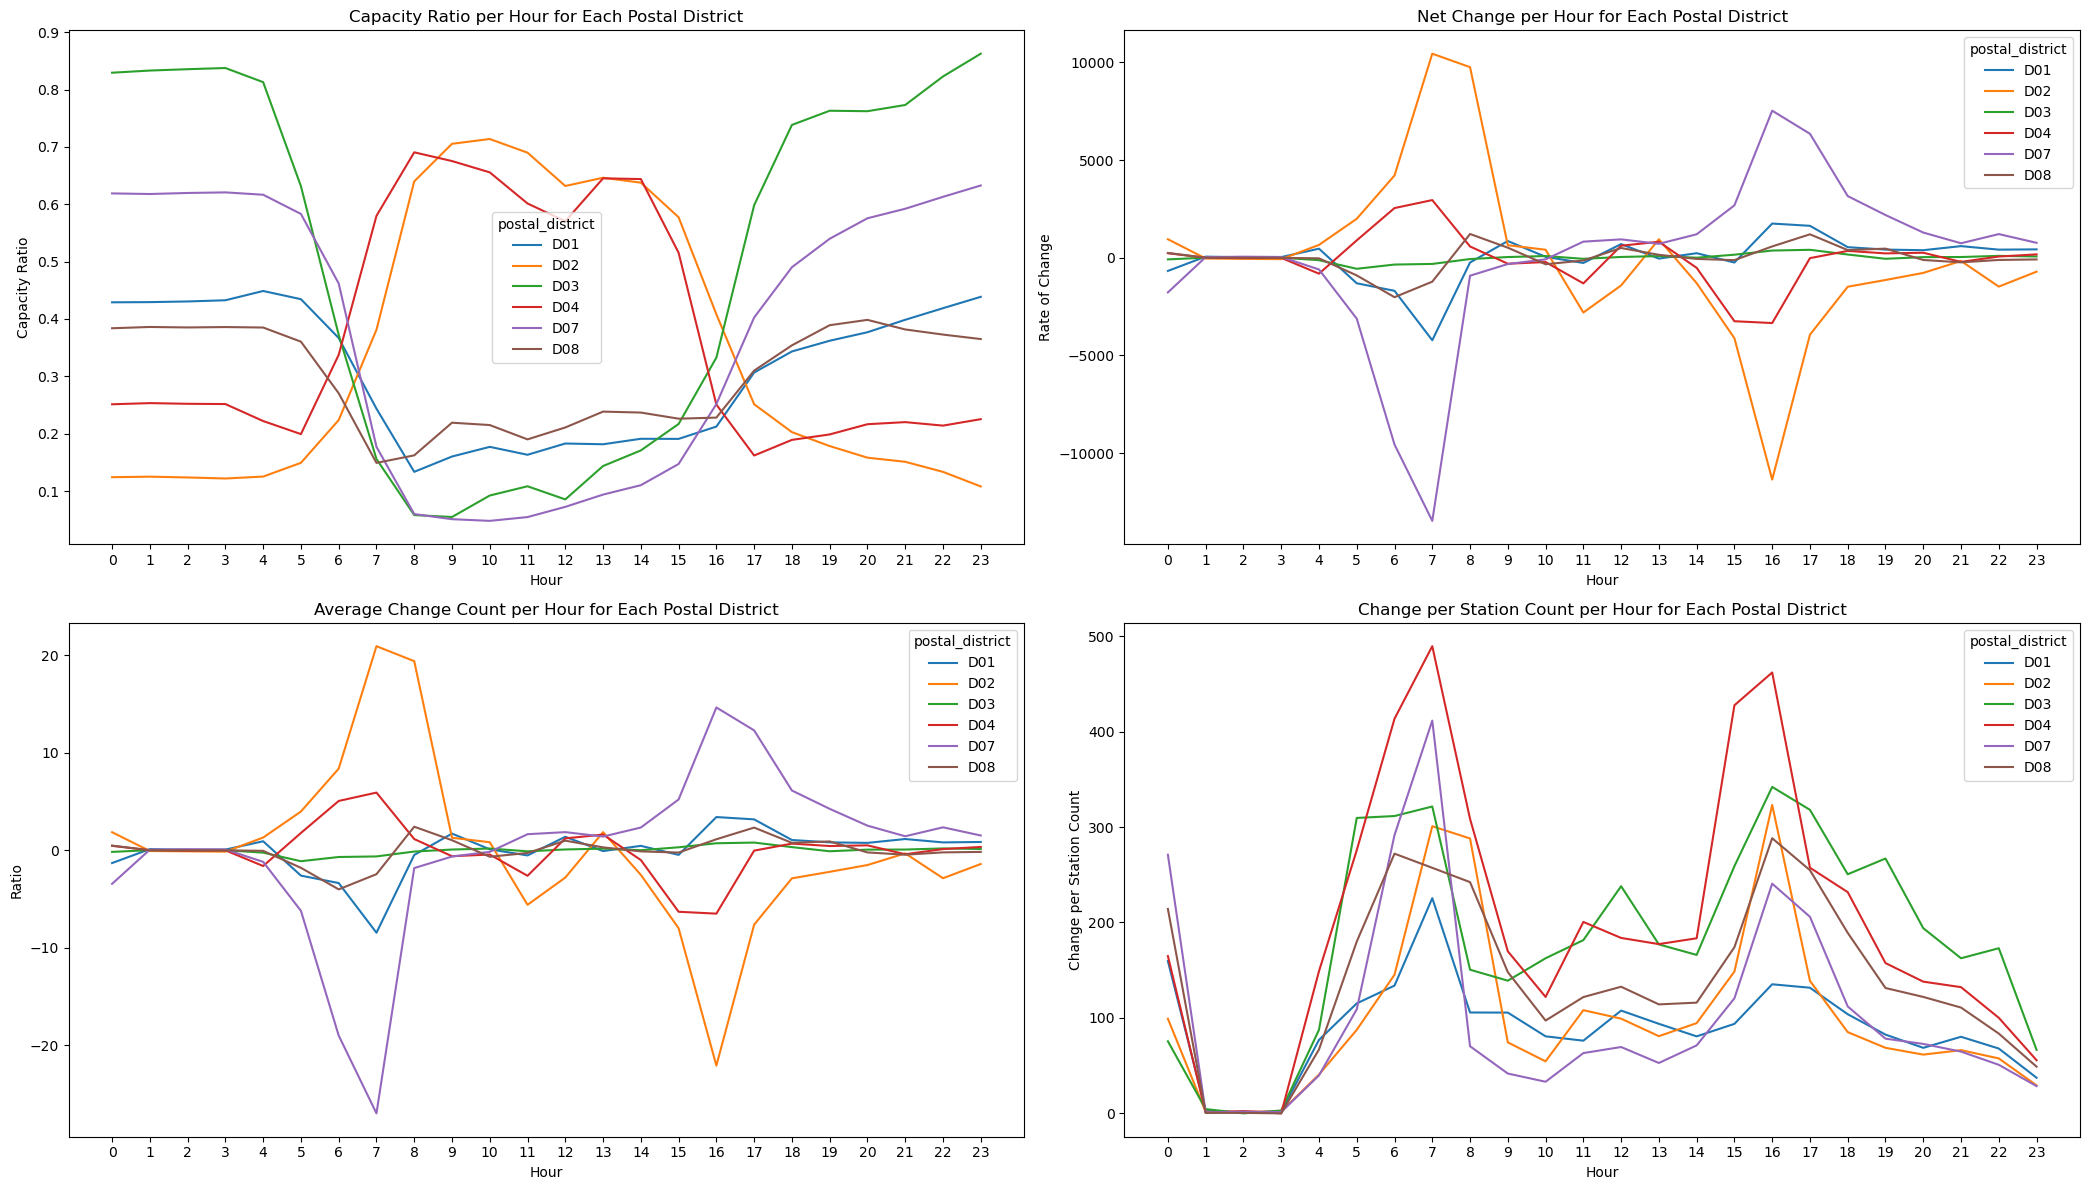

In [15]:
# Create a subset excluding 'Weekend' day type
# week_day_subset_df = subset_df[subset_df['day_type'] != 'Weekend']
#week_day_subset_df['rate_of_change_per_bike_stand'] = week_day_subset_df['rate_of_change'] / week_day_subset_df['bike_stands'] 

result_df = subset_df.groupby(['hour_ht', 'TIME', 'postal_district']).agg({
    'AVAILABLE BIKES': 'sum',
    'BIKE STANDS': 'sum'
}).reset_index()


# Group by address and postal_district to get unique combinations
unique_stations_postal_address = df[['NAME', 'postal_district']].drop_duplicates()

# Merge the unique postal districts back to max_bike_stands_station
max_bike_stands_station = max_bike_stands_station.merge(unique_stations_postal_address, how='inner', on='NAME')

# Calculate the total bike stands for each postal district
bike_stands_district_total = max_bike_stands_station.groupby(['postal_district'])['BIKE STANDS'].sum().reset_index()
bike_stands_district_total.rename(columns={'BIKE STANDS': 'bike_stands_district_total'}, inplace=True)

# Merge the results with result_df
result_df = result_df.merge(bike_stands_district_total, on='postal_district', how='left')

count_stations_per_district = max_bike_stands_station.groupby(['postal_district'])['NAME'].nunique().reset_index()
count_stations_per_district
result_df = result_df.merge(count_stations_per_district, on='postal_district', how='left')


# Calculate rate of change
# Step 2: Sort by address and then by harvest_time in descending order
result_df.sort_values(by=['postal_district', 'TIME'], ascending=[True, False], inplace=True)
result_df['previous_available_bikes'] = result_df.groupby('postal_district')['AVAILABLE BIKES'].shift(-1)
result_df['rate_of_change'] = result_df['AVAILABLE BIKES'] - result_df['previous_available_bikes']
result_df['rate_of_change_abs'] = result_df['rate_of_change'].abs()




result_df_hour_agg = result_df.groupby(['hour_ht', 'postal_district']).agg({
    'AVAILABLE BIKES': 'sum',
    'rate_of_change': ['mean', 'sum'], 
    'rate_of_change_abs': ['mean', 'sum'],
    'previous_available_bikes': 'sum',
    'bike_stands_district_total': 'max',
    'BIKE STANDS': 'sum',
    'NAME': 'max'
}).reset_index()

# Flatten multi-index columns if needed
result_df_hour_agg.columns = ['_'.join(col).rstrip('_') for col in result_df_hour_agg.columns.values]

#calcs
result_df_hour_agg['ratio'] = result_df_hour_agg['rate_of_change_mean'] / result_df_hour_agg['bike_stands_district_total_max']
result_df_hour_agg['ratio_abs'] = result_df_hour_agg['ratio'].abs()
result_df_hour_agg['capacity_ratio'] = result_df_hour_agg['AVAILABLE BIKES_sum'] / result_df_hour_agg['BIKE STANDS_sum']
result_df_hour_agg['change_per_station_count'] = result_df_hour_agg['rate_of_change_sum'] / result_df_hour_agg['NAME_max']
result_df_hour_agg['change_per_station_count_abs'] = result_df_hour_agg['rate_of_change_abs_sum'] / result_df_hour_agg['NAME_max']

#result_df_hour_agg = result_df_hour_agg.fillna(result_df_hour_agg.mean())


# Set up the subplot grid for four charts
fig, axes = plt.subplots(2, 2, figsize=(21, 12))

# Plot capacity_ratio
sns.lineplot(data=result_df_hour_agg, x='hour_ht', y='capacity_ratio', hue='postal_district', ax=axes[0, 0])
axes[0, 0].set_title('Capacity Ratio per Hour for Each Postal District')
axes[0, 0].set_ylabel('Capacity Ratio')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_xticks(list(range(0, 24)))

# Plot rate_of_change
sns.lineplot(data=result_df_hour_agg, x='hour_ht', y='rate_of_change_sum', hue='postal_district', ax=axes[0, 1])
axes[0, 1].set_title('Net Change per Hour for Each Postal District')
axes[0, 1].set_ylabel('Rate of Change')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_xticks(list(range(0, 24)))

# Plot ratio
sns.lineplot(data=result_df_hour_agg, x='hour_ht', y='rate_of_change_mean', hue='postal_district', ax=axes[1, 0])
axes[1, 0].set_title('Average Change Count per Hour for Each Postal District')
axes[1, 0].set_ylabel('Ratio')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_xticks(list(range(0, 24)))

# Plot change_per_station_count
sns.lineplot(data=result_df_hour_agg, x='hour_ht', y='change_per_station_count_abs', hue='postal_district', ax=axes[1, 1])
axes[1, 1].set_title('Change per Station Count per Hour for Each Postal District')
axes[1, 1].set_ylabel('Change per Station Count')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_xticks(list(range(0, 24)))

# Adjust the layout to prevent overlap and place the legend outside of the plots
fig.tight_layout()
handles, labels = axes[1, 1].get_legend_handles_labels()

# Manually set the labels for the legend
unique_postal_districts = result_df_hour_agg['postal_district'].unique()
fig.legend(handles=handles[1:], labels=unique_postal_districts, title='Postal District', loc='center right', bbox_to_anchor=(1.1, 0.5))

# Remove legends from individual plots to avoid repetition
for ax in axes.flat:
    ax.get_legend().remove()

plt.show()

D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

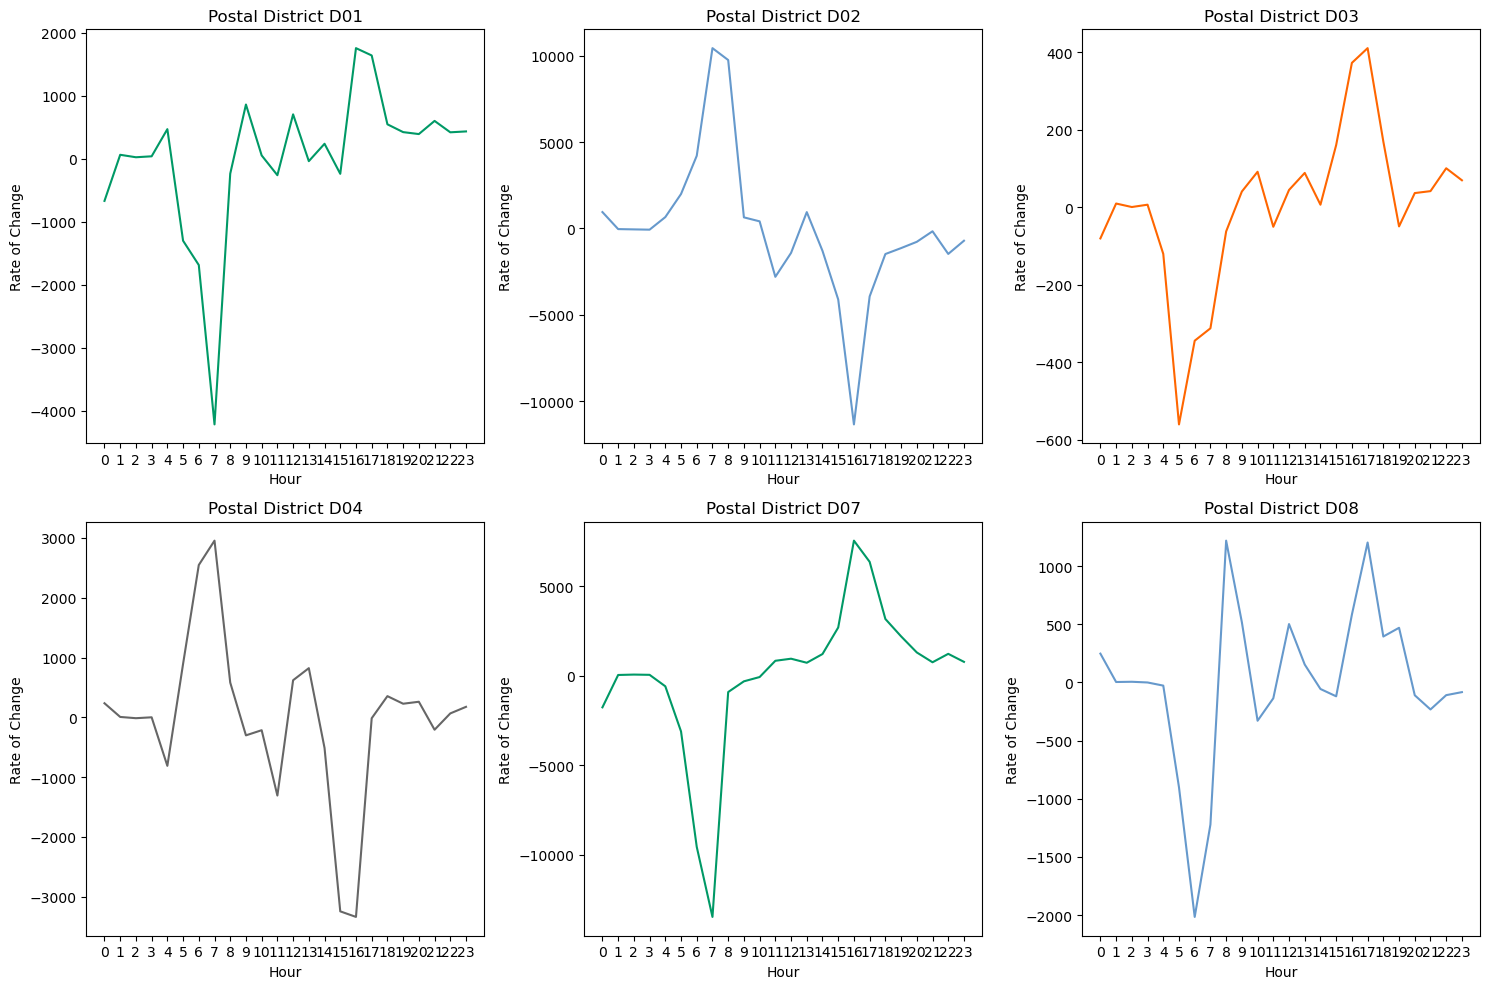

In [16]:
n_rows = 2
n_cols = 3

# Set up the plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define color palette representing Dublin, Ireland
dublin_colors = ['#009966', '#6699cc', '#ff6600', '#666666']

# Plot time series for each postal district with Dublin colors
for i, postal_district in enumerate(unique_postal_districts):
    postal_data = result_df_hour_agg[result_df_hour_agg['postal_district'] == postal_district]
    color = dublin_colors[i % len(dublin_colors)]
    sns.lineplot(data=postal_data, x='hour_ht', y='rate_of_change_sum', ax=axes[i], color=color)
    axes[i].set_title(f'Postal District {postal_district}')
    axes[i].set_ylabel('Rate of Change')
    axes[i].set_xlabel('Hour')
    axes[i].set_xticks(list(range(0, 24)))

# Hide empty subplots
for i in range(len(unique_postal_districts), len(axes)):
    axes[i].axis('off')

# Adjust the layout to prevent overlap
fig.tight_layout()

plt.show()

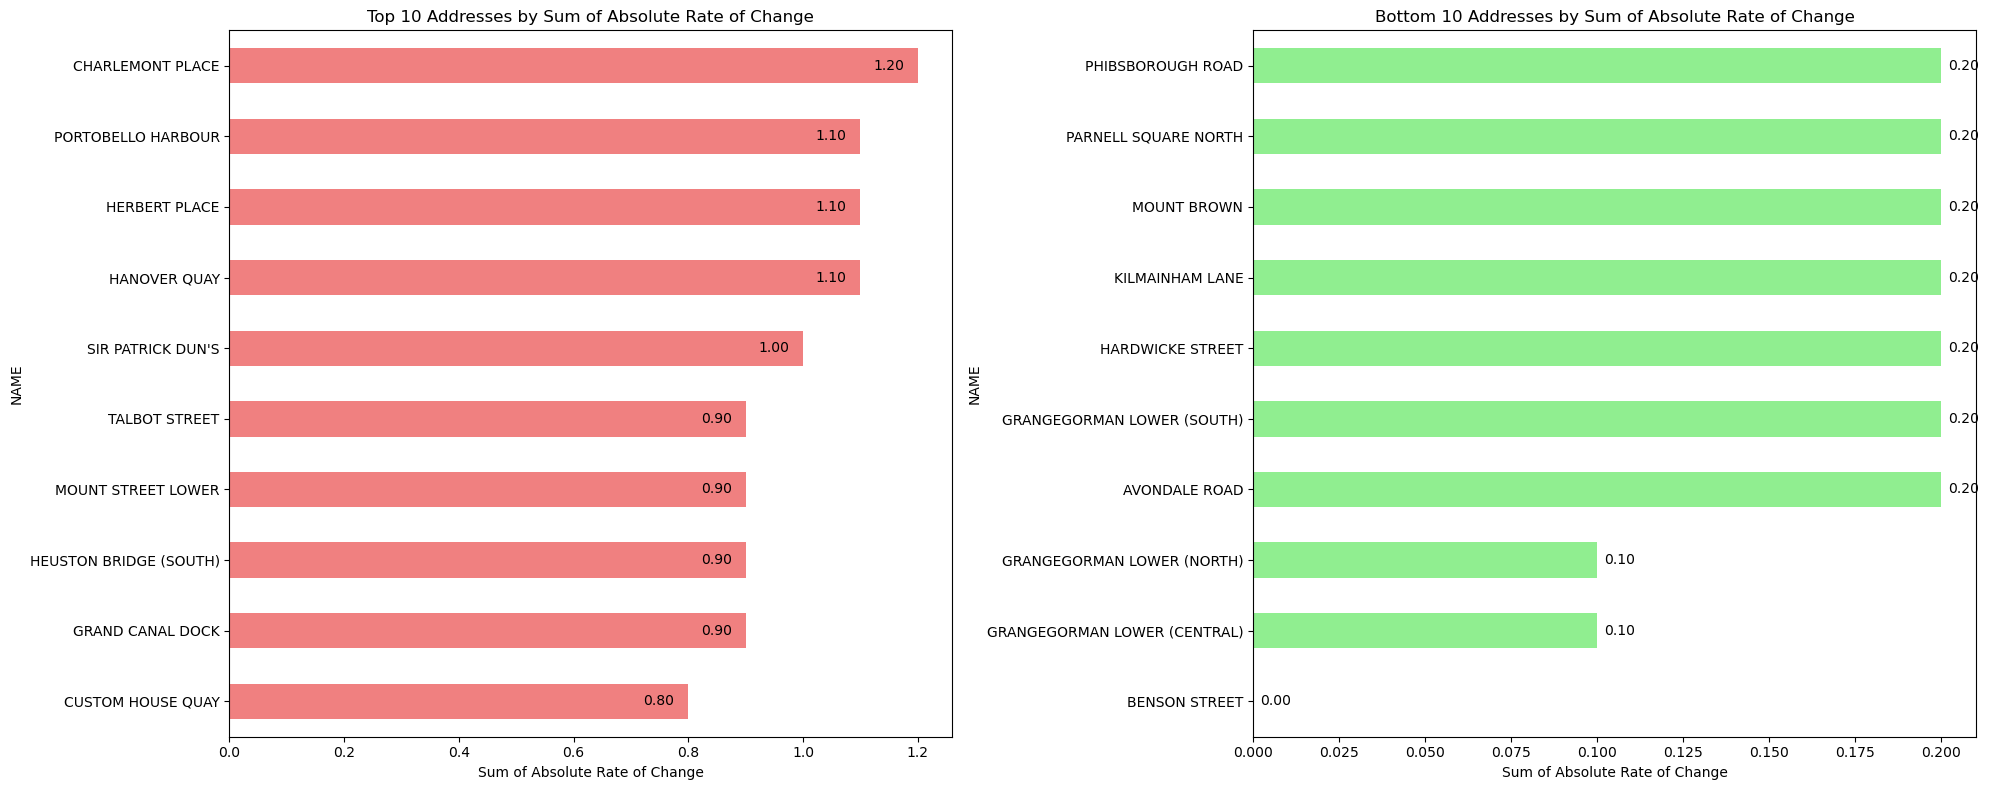

In [17]:
# Calculate the sum of absolute rate of change for each address
sum_rate_of_change_address = subset_df.groupby('NAME')['abs_rate_of_change'].mean() 
sum_rate_of_change_address = round(sum_rate_of_change_address, 1)

# Get the top 5 addresses by highest sum of absolute rate of change
top_10_addresses = sum_rate_of_change_address.nlargest(10)

# Get the bottom 5 addresses by least sum of absolute rate of change
bottom_10_addresses = sum_rate_of_change_address.nsmallest(10)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top 5 Addresses with Highest Sum of Absolute Rate of Change
top_10_addresses.sort_values().plot(kind='barh', ax=ax1, color='lightcoral')
ax1.set_title('Top 10 Addresses by Sum of Absolute Rate of Change')
ax1.set_xlabel('Sum of Absolute Rate of Change')
ax1.set_ylabel('NAME')

# Adding data labels on bars for the first plot
for bar in ax1.patches:
    ax1.text(bar.get_width() - (0.02 * top_10_addresses.max()),
             bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}',  
             va='center', 
             ha='right',
             color='black')

# Bottom 5 Addresses with Least Sum of Absolute Rate of Change
bottom_10_addresses.sort_values().plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Bottom 10 Addresses by Sum of Absolute Rate of Change')
ax2.set_xlabel('Sum of Absolute Rate of Change')
ax2.set_ylabel('NAME')

# Adding data labels on bars for the second plot
for bar in ax2.patches:
    ax2.text(bar.get_width() + (0.01 * bottom_10_addresses.max()),  
             bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}',  
             va='center', 
             ha='left',
             color='black')

plt.tight_layout()
plt.show()

In [18]:
# Calculate mean rate of change and mean capacity ratio for each address
rate_of_change_agg = subset_df.groupby('NAME').agg({
    'rate_of_change': ['mean', 'sum'], 
    'AVAILABLE BIKES': 'sum',
    'BIKE STANDS': 'sum',
    'abs_rate_of_change': ['mean', 'sum'], 
    'bikes_added': 'sum',
    'bikes_removed': 'sum'
}).reset_index()

# Flatten multi-index columns if needed
rate_of_change_agg.columns = ['_'.join(col).rstrip('_') for col in rate_of_change_agg.columns.values]


rate_of_change_agg['cap_ratio'] = rate_of_change_agg['AVAILABLE BIKES_sum'] / rate_of_change_agg['BIKE STANDS_sum']

max_bike_stands_station = max_bike_stands_station.rename(columns={'BIKE STANDS': 'total_bike_stands'})
rate_of_change_agg = rate_of_change_agg.merge(max_bike_stands_station, on='NAME', how='left')

rate_of_change_agg['rate_of_change_per_bike_stand'] = rate_of_change_agg['rate_of_change_sum'] / rate_of_change_agg['total_bike_stands']

rate_of_change_agg['ratio_added_removed'] = rate_of_change_agg['bikes_added_sum'] / rate_of_change_agg['bikes_removed_sum']

# Normalize the data
scaler = StandardScaler()
rate_of_change_agg[['normalized_rate_change', 'abs_normalized_rate_change', 'normalized_cap_ratio', 'normalized_rate_of_change_per_bike_stand', 'normalized_ratio_added_removed', 'normalized_rate_of_change_mean', 'normalized_abs_rate_of_change_sum', 'normalized_abs_rate_of_change_mean']] = scaler.fit_transform(rate_of_change_agg[['rate_of_change_sum', 'abs_rate_of_change_sum', 'cap_ratio', 'rate_of_change_per_bike_stand', 'ratio_added_removed', 'rate_of_change_mean', 'abs_rate_of_change_sum', 'abs_rate_of_change_mean']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=7)  
rate_of_change_agg['cluster'] = kmeans.fit_predict(rate_of_change_agg[['normalized_cap_ratio', 'normalized_abs_rate_of_change_mean']])

D:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


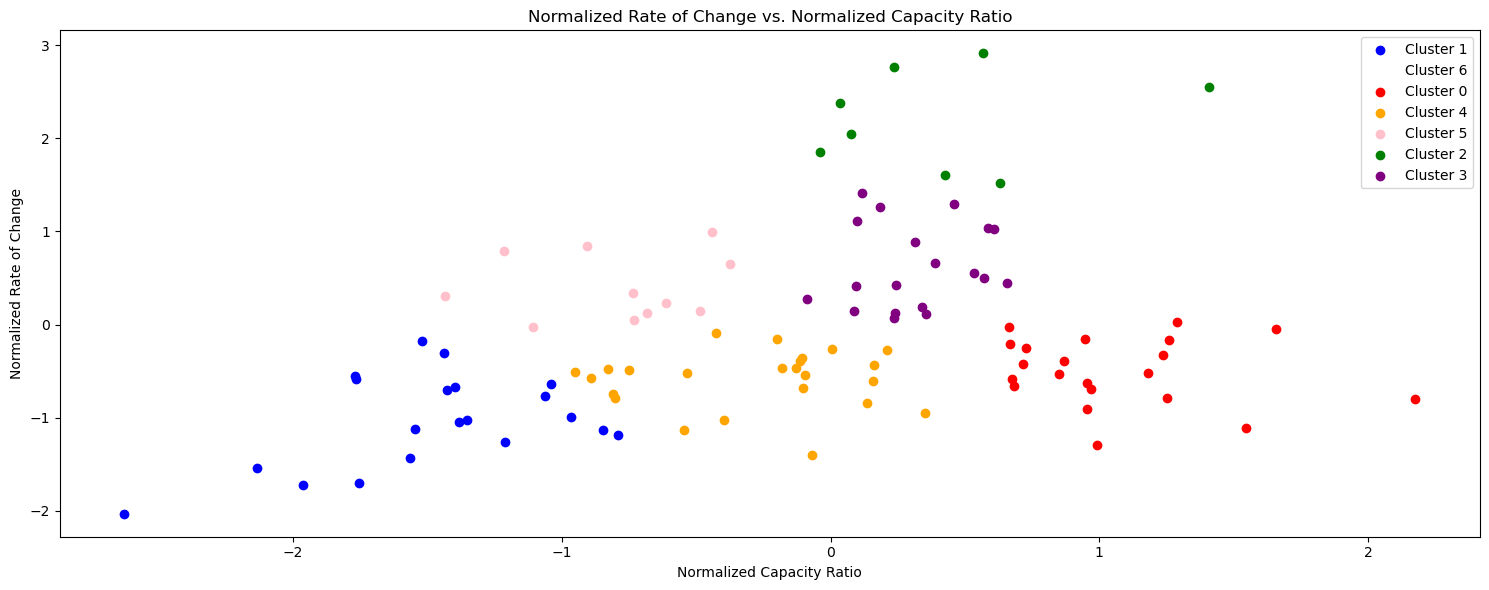

NameError: name 'adjust_text' is not defined

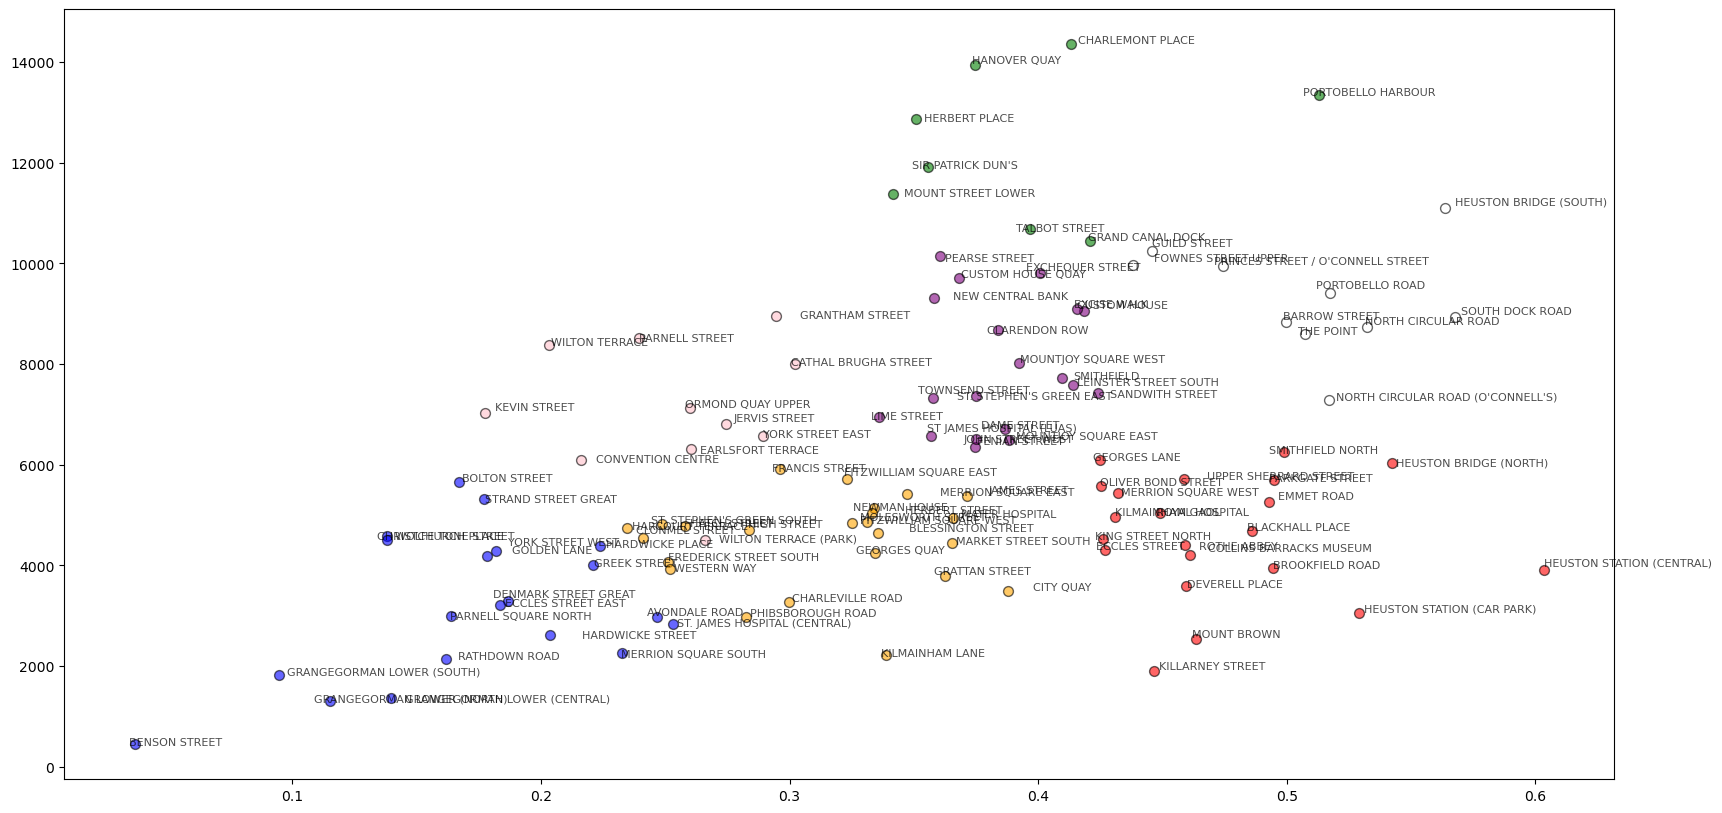

In [19]:
# Define a color mapping for clusters
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'pink',
    6: 'white'
}


# Adjust the width by changing the figsize parameter
plt.figure(figsize=(15, 6))

# Looping through unique clusters
for cluster in rate_of_change_agg['cluster'].unique():
    subset = rate_of_change_agg[rate_of_change_agg['cluster'] == cluster]
    plt.scatter(subset['normalized_cap_ratio'], subset['normalized_abs_rate_of_change_mean'], 
                color=cluster_colors[cluster], label=f'Cluster {cluster}')

plt.title('Normalized Rate of Change vs. Normalized Capacity Ratio')
plt.xlabel('Normalized Capacity Ratio')
plt.ylabel('Normalized Rate of Change')
plt.legend()
plt.tight_layout()
plt.show()


# Increase figure size
plt.figure(figsize=(20, 10))

# Add jitter
def add_jitter(values, factor=0.01):
    return values + np.random.randn(len(values)) * factor

jittered_cap_ratio = add_jitter(rate_of_change_agg['cap_ratio'], 0.005)
jittered_abs_rate_of_change = add_jitter(rate_of_change_agg['abs_rate_of_change_sum'], 50)   # Adjusted factor

# Scatter plot with color-coding based on clusters
for cluster in rate_of_change_agg['cluster'].unique():
    subset = rate_of_change_agg[rate_of_change_agg['cluster'] == cluster]
    plt.scatter(subset['cap_ratio'], subset['abs_rate_of_change_sum'], 
                color=cluster_colors[cluster], label=f'Cluster {cluster}', alpha=0.6, edgecolors='k', s=50)

# Adding labels with jittered values
texts = []
for i, row in rate_of_change_agg.iterrows():
    texts.append(plt.text(jittered_cap_ratio[i], jittered_abs_rate_of_change[i], row['NAME'], fontsize=8, alpha=0.7))

# Use adjust_text to rearrange overlapping labels without arrows
adjust_text(texts, only_move={'points':'y', 'texts':'y'})

plt.title('Net Change vs. Capacity Ratio In L14 Days')
plt.xlabel('Average Capacity Ratio')
plt.ylabel('Absolute Net Change')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
def get_cluster_color(cluster):
    """Function to return color based on cluster number."""
    folium_colors = {
        0: 'red',
        1: 'blue',
        2: 'green',
        3: 'purple',
        4: 'orange',
        5: 'pink',
        6: 'white'
    }
    return folium_colors.get(cluster, 'gray')

# Group data by address to get the unique latitude and longitude values
grouped_data = subset_df.groupby(['NAME', 'LATITUDE', 'LONGITUDE']).first().reset_index()
grouped_data = grouped_data.merge(rate_of_change_agg[['NAME', 'cluster', 'cap_ratio', 'abs_rate_of_change_mean']], on='NAME', how='left')

# grouped_data['rate_of_change_mean'] = round(grouped_data['rate_of_change_mean'], 2)
grouped_data['cap_ratio'] = round(grouped_data['cap_ratio'], 2)
grouped_data['abs_rate_of_change_mean'] = round(grouped_data['abs_rate_of_change_mean'], 2)

# Convert latitude and longitude to numeric
grouped_data['LATITUDE'] = pd.to_numeric(grouped_data['LATITUDE'], errors='coerce')
grouped_data['LONGITUDE'] = pd.to_numeric(grouped_data['LONGITUDE'], errors='coerce')

# Create a base map
m = folium.Map(location=[grouped_data['LATITUDE'].mean(), grouped_data['LONGITUDE'].mean()], zoom_start=14)

# Add stations to the map
for _, row in grouped_data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['NAME']} - Cluster: {row['cluster']} - Capacity Ratio: {row['cap_ratio']} - Average Change Rate {row['abs_rate_of_change_mean']}",
        icon=folium.Icon(color=get_cluster_color(row['cluster'])),
    ).add_to(m)

m

In [21]:
subset_df['capacity_ratio'] = subset_df['AVAILABLE BIKES'] / subset_df['BIKE STANDS']

In [22]:
# lets merge back now cluster
df = pd.merge(df, rate_of_change_agg[['NAME', 'cluster']], on='NAME', how='left')
subset_df = pd.merge(subset_df, rate_of_change_agg[['NAME', 'cluster']], on='NAME', how='left')

In [23]:
# Group by 'cluster'
grouped = subset_df.groupby('cluster')

# Aggregate the data
agg_data = grouped.agg(
    unique_addresses=pd.NamedAgg(column='NAME', aggfunc='nunique'),
    sum_available_bikes=pd.NamedAgg(column='AVAILABLE BIKES', aggfunc='sum'),
    sum_bike_stands=pd.NamedAgg(column='BIKE STANDS', aggfunc='sum')
)

# Calculate capacity ratio
agg_data['capacity_ratio'] = agg_data['sum_available_bikes'] / agg_data['sum_bike_stands']

# Round capacity ratio to 2 decimal places
agg_data['capacity_ratio'] = agg_data['capacity_ratio'].round(2)

# Reset index to make 'cluster' a column instead of an index
agg_data.reset_index(inplace=True)

# Sort the data based on capacity ratio
agg_data = agg_data.sort_values(by='capacity_ratio', ascending=False)

#print
agg_data

,cluster,unique_addresses,sum_available_bikes,sum_bike_stands,capacity_ratio
6,6,10,1877392,3723491,0.50
0,0,21,3913221,8216570,0.48
2,2,8,1436142,3650480,0.39
3,3,19,2879623,7508043,0.38
4,4,24,2959528,9478913,0.31
5,5,11,939065,3767469,0.25
1,1,20,1217243,7237086,0.17


In [24]:
# Group by postal district and cluster, and count unique addresses
unique_addresses_per_district_cluster = grouped_data.groupby(['postal_district', 'cluster'])['NAME'].nunique()

# Convert to a DataFrame
unique_addresses_per_district_cluster_df = unique_addresses_per_district_cluster.reset_index()

# Rename columns for clarity
unique_addresses_per_district_cluster_df.columns = ['Postal District', 'Cluster', 'Unique Addresses Count']

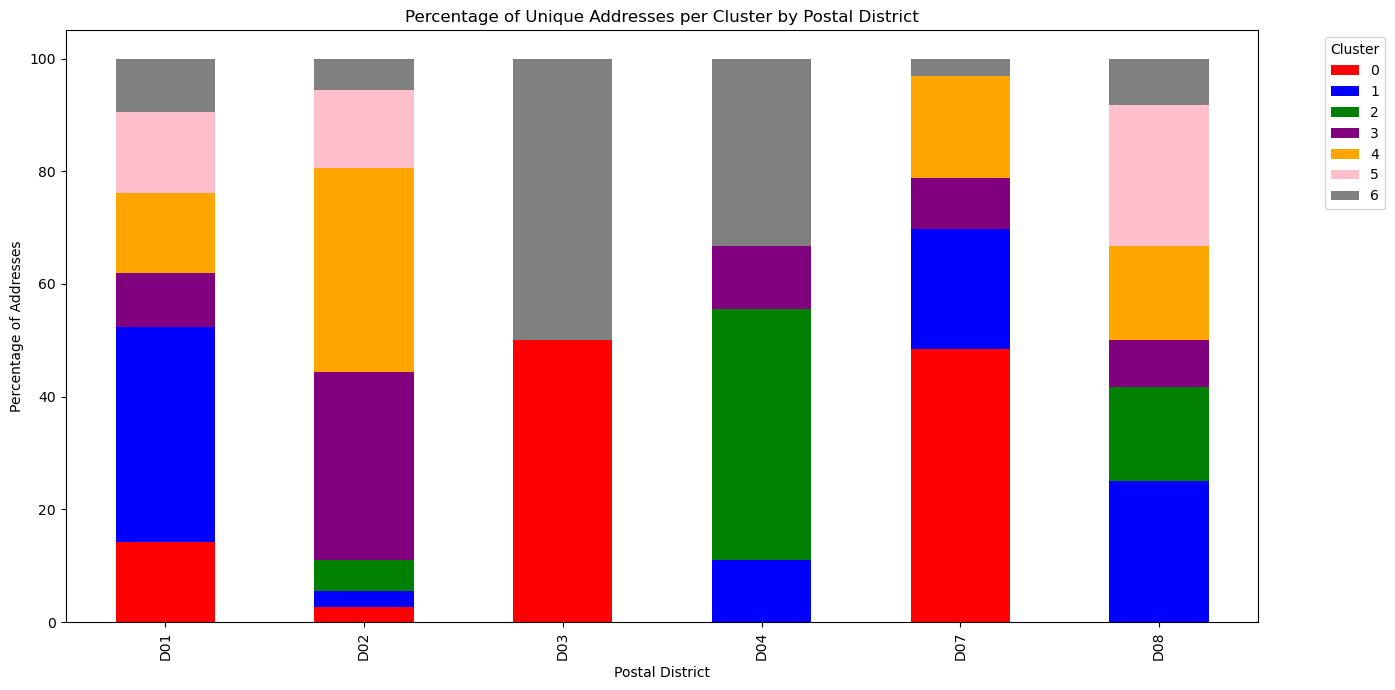

In [25]:
color_map = {
    0: 'red', 
    1: 'blue', 
    2: 'green', 
    3: 'purple', 
    4: 'orange', 
    5: 'pink', 
    6: 'grey'
}

# Calculate the total addresses per postal district.
total_addresses_per_district = unique_addresses_per_district_cluster_df.groupby('Postal District')['Unique Addresses Count'].sum().reset_index(name='Total')

# Merge with the original DataFrame to get the total addresses for each postal district.
merged_df = unique_addresses_per_district_cluster_df.merge(total_addresses_per_district, on='Postal District')

# Calculate the percentage of addresses for each cluster.
merged_df['Percentage'] = merged_df['Unique Addresses Count'] / merged_df['Total'] * 100

# Pivot the table to get percentages for each cluster by postal district.
pivot_df = merged_df.pivot(index='Postal District', columns='Cluster', values='Percentage').fillna(0)

# Sort the clusters to maintain consistent color ordering.
sorted_clusters = sorted(pivot_df.columns)

# Apply the color map to the sorted clusters.
cluster_colors = [color_map[cluster] for cluster in sorted_clusters if cluster in color_map]

# Plot the stacked bar chart.
pivot_df[sorted_clusters].plot(kind='bar', stacked=True, color=cluster_colors, figsize=(14, 7))

# Customize the plot.
plt.title('Percentage of Unique Addresses per Cluster by Postal District')
plt.xlabel('Postal District')
plt.ylabel('Percentage of Addresses')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot.
plt.show()

In [26]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
sub_df_address_group1 = df.groupby(['NAME']).agg({'AVAILABLE BIKES': 'sum', 'BIKE STANDS': 'sum','STATION ID': 'first', 'LATITUDE': 'first', 'LONGITUDE': 'first'}).reset_index()
sub_df_address_group1.head(50)

,NAME,AVAILABLE BIKES,BIKE STANDS,STATION ID,LATITUDE,LONGITUDE
0,AVONDALE ROAD,147866,693480,108,53.359406,-6.276142
1,BARROW STREET,220382,485436,70,53.341656,-6.236198
2,BENSON STREET,20421,693480,90,53.344154,-6.233451
3,BLACKHALL PLACE,259457,520110,88,53.348801,-6.281637
4,BLESSINGTON STREET,103793,346740,2,53.356770,-6.268140
5,BOLTON STREET,82681,346740,3,53.351181,-6.269859
6,BROOKFIELD ROAD,240567,520110,84,53.339005,-6.300217
7,CATHAL BRUGHA STREET,139186,346740,24,53.352150,-6.260533
8,CHARLEMONT PLACE,311581,693480,5,53.330662,-6.260177
9,CHARLEVILLE ROAD,193321,693480,107,53.359158,-6.281866


In [42]:
# Calculate the capacity ratio for each site
sub_df_address_group1['capacity_ratio'] = sub_df_address_group1['AVAILABLE BIKES'] / sub_df_address_group1['BIKE STANDS']

# Clustering with KMeans
kmeans = KMeans(n_clusters=40)  
X = sub_df_address_group1[['LATITUDE', 'LONGITUDE']]
kmeans.fit(X)

# Latitude and longitude of clustering centres
cluster_centers = kmeans.cluster_centers_

# Calculate the latitude and longitude ranges for each cluster
cluster_ranges = []
for center in cluster_centers:
    lat_range = (center[0] - 0.01, center[0] + 0.01)  # Latitude range
    lon_range = (center[1] - 0.01, center[1] + 0.01)  # longitude range
    cluster_ranges.append((lat_range, lon_range))

print("Latitude and longitude ranges for each cluster：", cluster_ranges)


D:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Latitude and longitude ranges for each cluster： [((53.338139000000005, 53.358139), (-6.2934434999999995, -6.2734435)), ((53.329826000000004, 53.349826), (-6.257291333333333, -6.237291333333333)), ((53.331483250000005, 53.35148325), (-6.27808825, -6.25808825)), ((53.347216375, 53.367216375), (-6.273221875, -6.253221875)), ((53.331413500000004, 53.3514135), (-6.319103, -6.299103000000001)), ((53.3372805, 53.357280499999995), (-6.246636, -6.226636)), ((53.331661000000004, 53.351661), (-6.266485, -6.246485000000001)), ((53.335829000000004, 53.355829), (-6.3072626666666665, -6.287262666666667)), ((53.335905000000004, 53.355905), (-6.261309499999999, -6.2413095)), ((53.3490435, 53.3690435), (-6.2911015, -6.2711015)), ((53.324122, 53.344122), (-6.275436, -6.255436)), ((53.3382482, 53.3582482), (-6.2762856, -6.2562856)), ((53.32879500000001, 53.348795), (-6.2640115, -6.2440115)), ((53.346342, 53.366341999999996), (-6.259568, -6.239568)), ((53.32455666666667, 53.34455666666667), (-6.26214733333

In [54]:
# Site Name List
station_names = ['HEUSTON STATION (CENTRAL)', 'PORTOBELLO HARBOUR', 'PORTOBELLO ROAD', 'HEUSTON STATION (CAR PARK)', 'MERRION SQUARE WEST', 'HEUSTON BRIDGE (NORTH)','BROOKFIELD ROAD','UPPER SHERRARD STREET','HEUSTON BRIDGE (SOUTH)','MOLESWORTH STREET','CHARLEMONT PLACE','HERBERT PLACE','HANOVER QUAY']

# Find the cluster where each site is located
station_clusters = {}
for name in station_names:
    station_row = sub_df_address_group1[sub_df_address_group1['NAME'] == name]
    station_lat = station_row['LATITUDE'].values[0]
    station_lon = station_row['LONGITUDE'].values[0]
    for i, cluster_range in enumerate(cluster_ranges):
        lat_range, lon_range = cluster_range
        if lat_range[0] <= station_lat <= lat_range[1] and lon_range[0] <= station_lon <= lon_range[1]:
            station_clusters[name] = i
            break

print("The cluster in which each site is located：", station_clusters)

# Add another station inside the cluster where each station is located and calculate the capacity_ratio of the new station
new_station_name = 'NEW STATION1'
new_station_lat = 53.331232
new_station_lon = -6.264900 

# Find the cluster where the new station is located
new_station_cluster = None
for i, cluster_range in enumerate(cluster_ranges):
    lat_range, lon_range = cluster_range
    if lat_range[0] <= new_station_lat <= lat_range[1] and lon_range[0] <= new_station_lon <= lon_range[1]:
        new_station_cluster = i
        break

if new_station_cluster is not None:
    # Get the station where the new station is clustered
    cluster_station_indices = np.where(kmeans.labels_ == new_station_cluster)[0]
    cluster_stations = sub_df_address_group1.iloc[cluster_station_indices]

    # Calculate capacity_ratio for new stations
    new_station_capacity_ratio = cluster_stations['capacity_ratio'].mean()
    print("Projected capacity_ratio for new stations：", new_station_capacity_ratio)
else:
    print("The new station is not in any of the clusters.")

The cluster in which each site is located： {'HEUSTON STATION (CENTRAL)': 7, 'PORTOBELLO HARBOUR': 10, 'PORTOBELLO ROAD': 10, 'HEUSTON STATION (CAR PARK)': 7, 'MERRION SQUARE WEST': 1, 'HEUSTON BRIDGE (NORTH)': 0, 'BROOKFIELD ROAD': 4, 'UPPER SHERRARD STREET': 3, 'HEUSTON BRIDGE (SOUTH)': 0, 'MOLESWORTH STREET': 2, 'CHARLEMONT PLACE': 10, 'HERBERT PLACE': 1, 'HANOVER QUAY': 5}
Projected capacity_ratio for new stations： 0.46253100305704564


In [45]:
# Site Name List
station_names = ['HEUSTON STATION (CENTRAL)', 'PORTOBELLO HARBOUR', 'PORTOBELLO ROAD', 'HEUSTON STATION (CAR PARK)', 'MERRION SQUARE WEST', 'HEUSTON BRIDGE (NORTH)','BROOKFIELD ROAD','UPPER SHERRARD STREET','HEUSTON BRIDGE (SOUTH)','MOLESWORTH STREET','CHARLEMONT PLACE','HERBERT PLACE','HANOVER QUAY']

# Find the cluster where each site is located
station_clusters = {}
for name in station_names:
    station_row = sub_df_address_group1[sub_df_address_group1['NAME'] == name]
    station_lat = station_row['LATITUDE'].values[0]
    station_lon = station_row['LONGITUDE'].values[0]
    for i, cluster_range in enumerate(cluster_ranges):
        lat_range, lon_range = cluster_range
        if lat_range[0] <= station_lat <= lat_range[1] and lon_range[0] <= station_lon <= lon_range[1]:
            station_clusters[name] = i
            break

print("The cluster in which each site is located：", station_clusters)

# Add another station inside the cluster where each station is located and calculate the capacity_ratio of the new station
new_station_name = 'NEW STATION2'
new_station_lat =   53.346683
new_station_lon = -6.290708 

# Find the cluster where the new station is located
new_station_cluster = None
for i, cluster_range in enumerate(cluster_ranges):
    lat_range, lon_range = cluster_range
    if lat_range[0] <= new_station_lat <= lat_range[1] and lon_range[0] <= new_station_lon <= lon_range[1]:
        new_station_cluster = i
        break

if new_station_cluster is not None:
    # Get the station where the new station is clustered
    cluster_station_indices = np.where(kmeans.labels_ == new_station_cluster)[0]
    cluster_stations = sub_df_address_group1.iloc[cluster_station_indices]

    # Calculate capacity_ratio for new stations
    new_station_capacity_ratio = cluster_stations['capacity_ratio'].mean()
    print("Projected capacity_ratio for new stations：", new_station_capacity_ratio)
else:
    print("The new station is not in any of the clusters.")


The cluster in which each site is located： {'HEUSTON STATION (CENTRAL)': 7, 'PORTOBELLO HARBOUR': 10, 'PORTOBELLO ROAD': 10, 'HEUSTON STATION (CAR PARK)': 7, 'MERRION SQUARE WEST': 1, 'HEUSTON BRIDGE (NORTH)': 0, 'BROOKFIELD ROAD': 4, 'UPPER SHERRARD STREET': 3, 'HEUSTON BRIDGE (SOUTH)': 0, 'MOLESWORTH STREET': 2, 'CHARLEMONT PLACE': 10, 'HERBERT PLACE': 1, 'HANOVER QUAY': 5}
Projected capacity_ratio for new stations： 0.5002242946583162
